In [1]:
%help %viz

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN

In [105]:
package 'Requirement Definitions' {
	private import ISQ::*;
	private import SI::*;

	requirement def MassLimitationRequirement {
		doc /* The actual mass shall be less than or equal to the required mass. */
		
		attribute massActual: MassValue;
		attribute massReqd: MassValue;
		
		require constraint { massActual <= massReqd }
	}
	
	part def Vehicle {
		attribute dryMass: MassValue;
		attribute fuelMass: MassValue;
		attribute fuelFullMass: MassValue;
	}
	
	requirement def <'1'> VehicleMassLimitationRequirement :> MassLimitationRequirement {
		doc /* The total mass of a vehicle shall be less than or equal to the required mass. */
		
		subject vehicle : Vehicle;
		
		attribute redefines massActual = vehicle.dryMass + vehicle.fuelMass;
		
		assume constraint { vehicle.fuelMass > 0[kg] }
	}
	
	port def ClutchPort;
	action def GenerateTorque;
	
	requirement def <'2'> DrivePowerInterface {
		doc /* The engine shall transfer its generated torque to the transmission via the clutch interface. */
		subject clutchPort: ClutchPort;
	}
		
	requirement def <'3'> TorqueGeneration {
		doc /* The engine shall generate torque as a function of RPM as shown in Table 1. */
		subject generateTorque: GenerateTorque;
	}
}

Package Requirement Definitions (f51f0828-12c8-41f2-916b-32e81cf28148)


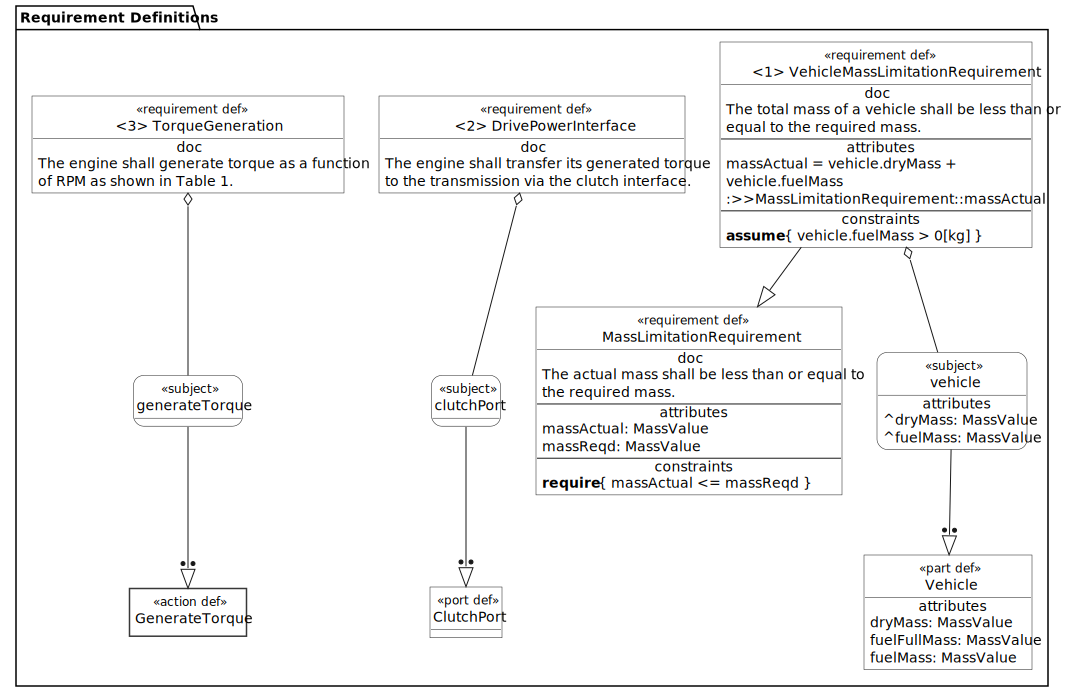

In [88]:
%viz "Requirement Definitions"

In [99]:
package 'Requirement Usages' {
	private import SI::*;
	private import 'Requirement Definitions'::*;
	
	requirement <'1.1'> fullVehicleMassLimit : VehicleMassLimitationRequirement {
		subject vehicle : Vehicle;
		attribute :>> massReqd = 2000[kg];
		
		assume constraint {
			doc /* Full tank is full. */
			vehicle.fuelMass == vehicle.fuelFullMass
		}
	}
	
	requirement <'1.2'> emptyVehicleMassLimit : VehicleMassLimitationRequirement {
		subject vehicle : Vehicle;
		attribute :>> massReqd = 1500[kg];
		
		assume constraint {
			doc /* Full tank is empty. */
			vehicle.fuelMass == 0[kg]
		}
	}
	
}

Package Requirement Usages (235f68ca-f6dd-4a3c-bea4-271712c967eb)


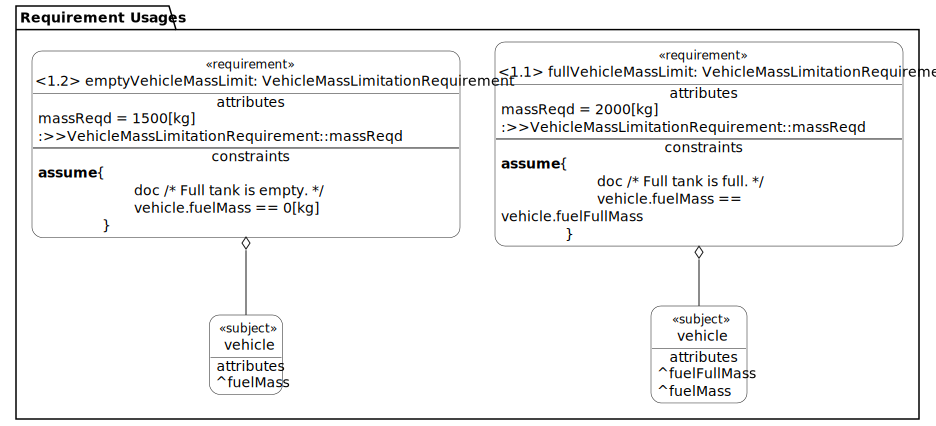

In [101]:
%viz "Requirement Usages"

In [107]:
package 'Requirement Groups' {
	private import 'Requirement Definitions'::*;
	private import 'Requirement Usages'::*;
	
	part def Engine {
		port clutchPort: ClutchPort;
		perform action generateTorque: GenerateTorque;
	}
	
	requirement vehicleSpecification {
		doc /* Overall vehicle requirements group */
		
		subject vehicle : Vehicle;
		
		require fullVehicleMassLimit;
		require emptyVehicleMassLimit;
	}
	
	requirement engineSpecification {
		doc /* Engine power requirements group */
		
		subject engine : Engine;
		
		requirement drivePowerInterface : DrivePowerInterface {
			subject = engine.clutchPort;
		}
		
		requirement torqueGeneration : TorqueGeneration {
			subject = engine.generateTorque;	
		}
	}
	
}

Package Requirement Groups (a0d72e94-de9a-4ef2-b815-6b8da4023406)


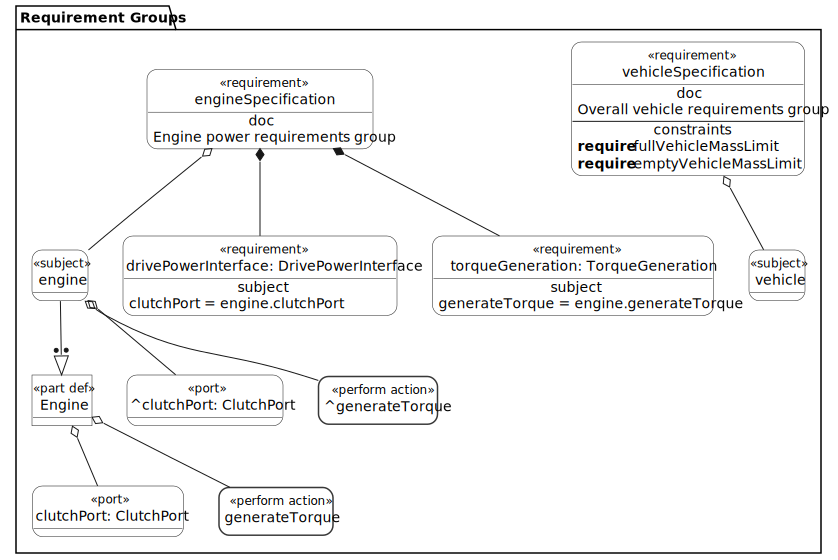

In [109]:
%viz "Requirement Groups"

In [112]:
package 'Requirement Satisfaction' {
	private import 'Requirement Definitions'::*;
	private import 'Requirement Groups'::*;
	
	action 'provide power' {
		action 'generate torque' { }
	}
	
	part vehicle_c1 : Vehicle {
		perform 'provide power';
			
		part engine_v1: Engine {
			port :>> clutchPort;
			perform 'provide power'.'generate torque' :>> generateTorque;
		}	
	}
	
	part 'Vehicle c1 Design Context' {
		
		ref vehicle_design :> vehicle_c1;
	
		satisfy vehicleSpecification by vehicle_design;
		satisfy engineSpecification by vehicle_design.engine_v1;
	
	}
	
}

Package Requirement Satisfaction (de50ef88-793a-4734-999f-8c055f624f29)


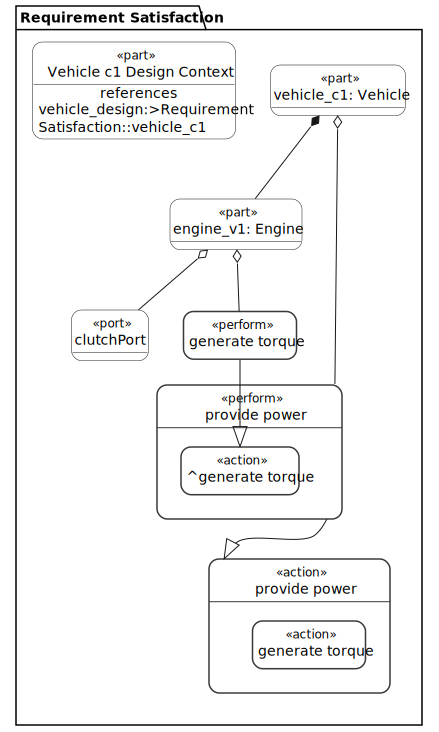

In [114]:
%viz "Requirement Satisfaction"